Hello! This notebook will cover encoding categorical variables

**1)** Categorical variables are important but hard to deal with because we cannot get statistical information out of strings other than the mode (المنوال) perhaps (the term that appears the most if you forgot that). Hence, we need to find a way such that more can be obtained from cateogrical variables. <br>

**Encoding** does that for us. There are many types of encoding but the concept is the same. Convert strings to numbers. Below are some types of encoding:

`Easy, Medium, Hard, Evil`

*   Binary Encoding: `001, 010, 011, 100`
*   One-hot encoding: `0001, 0010, 0100, 1000`
*   Label Eocoding: `0, 1, 2, 3`
*   Other encoding techniques: frequency encoding, target encoding etc.

<br>

below are some examples of using some encoding techniques


1) Binary Encoding

In [1]:
#Many libraries provide encoding methods including sklearn but we will use a general one
!pip install category_encoders --quiet #installing the library (quiet option hides the full downloading process)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
#creating some dataframe from scratch (For illustration purposes)
data = [[0,'easy'],[1,'easy'],[2,'medium'],[3,'evil'],[4,'medium'],[5,'hard']]
df = pd.DataFrame(data, columns = ['Notebook', 'Difficulty'])
df

,Notebook,Difficulty
0,0,easy
1,1,easy
2,2,medium
3,3,evil
4,4,medium
5,5,hard


In [3]:
from category_encoders import BinaryEncoder
BinaryEncoder(cols=['Difficulty']).fit(df).transform(df)

,Notebook,Difficulty_0,Difficulty_1,Difficulty_2
0,0,0,0,1
1,1,0,0,1
2,2,0,1,0
3,3,0,1,1
4,4,0,1,0
5,5,1,0,0


As above, three new columns replaced the difficulty column in which the variables are encoded in binary format. (001, 010, 011, 100).

2) One Hot Encoding

In [4]:
#refreshing the dataframe
data = [[0,'easy'],[1,'easy'],[2,'medium'],[3,'evil'],[4,'medium'],[5,'hard']]
df = pd.DataFrame(data, columns = ['Notebook', 'Difficulty'])

In [5]:
from category_encoders import OneHotEncoder
OneHotEncoder(cols=['Difficulty']).fit(df).transform(df)

,Notebook,Difficulty_1,Difficulty_2,Difficulty_3,Difficulty_4
0,0,1,0,0,0
1,1,1,0,0,0
2,2,0,1,0,0
3,3,0,0,1,0
4,4,0,1,0,0
5,5,0,0,0,1


Note that one hot encoder added 4 columns instead of 3. That is because it does not allow replications. 011 is invalid --> 100 is used to represent 3. One hot encoding is the most popular method in deep learning as it is used for texts (ChatGPT training uses one-hot encoding for words)

These techniques are fine. However, one must be careful because of the well-known (not to you yet) **Curse of diminsionality**. In simple terms, encoding is adding more features to the data. Yes it is one feature but the computer now has 4 columns instead of 1 to represent difficulty. This means higher computational cost and mostly worse performance. <br>

 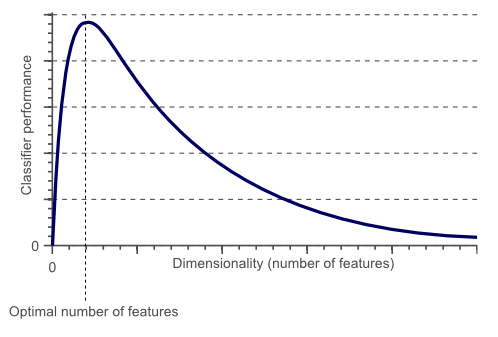

3) Target Encoding

Other techniques avoids that by following other encoding methods but are still in debate as it may result in overfitting such as target encoding. <br>

Overfitting is when the model works on what you trained it on only, it fails when new data is shown.  <br>

Target encoding links takes the mean of the target variable then adds some bias that corresponds to the feature which can be considered not fair. Anyway who cares.

In [9]:
#refreshing the dataframe
data = [[0,'easy'],[1,'easy'],[2,'medium'],[3,'evil'],[4,'medium'],[5,'hard']]
df = pd.DataFrame(data, columns = ['Notebook', 'Difficulty'])

In [10]:
from category_encoders import TargetEncoder
TargetEncoder(cols=['Difficulty']).fit(df, df['Notebook']).transform(df)

,Notebook,Difficulty
0,0,2.216298
1,1,2.216298
2,2,2.570926
3,3,2.565054
4,4,2.570926
5,5,2.825271


4) Label Encoding

In general, label encoding is always a safe option when having a reasonable number of features and will be used often.

In [11]:
#refreshing the dataframe
data = [[0,'easy'],[1,'easy'],[2,'medium'],[3,'evil'],[4,'medium'],[5,'hard']]
df = pd.DataFrame(data, columns = ['Notebook', 'Difficulty'])

In [12]:
from sklearn import preprocessing #will use sklearn here as it is more common
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['Difficulty']= label_encoder.fit_transform(df['Difficulty'])
df

,Notebook,Difficulty
0,0,0
1,1,0
2,2,3
3,3,1
4,4,3
5,5,2
